In [ ]:
"""
ts8_SC_180415_sine_grating_WBC02b.png
ts8_SC_180415_sine_grating_WBC11a.png
ts9_SC_180419_sine_grating_WBC13b.png
ts10_V1_180422_ABABA_2_WBC12a.png
ts10_V1_180424_ABABB_WBC09a.png
ts10_V1_180424_ABABB_WBC09b.png
ts11_V1_180424_ABABA_WBC04a.png
"""
# ts9-sc-180419-13b
# ts9_SC_180419_sine_grating_WBC13b

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
from tqdm import tqdm
import os
import spike
pd.options.mode.chained_assignment = None  # default='warn'
# ts10_V1_180424_ABABB
mouse_name = "ts9_SC"
date = "180419"
session_name = "sine_grating"
#ts9_SC_180419_sine_grating

experiment_id = "{mouse}_{date}_{session}".format(mouse=mouse_name, date=date, session=session_name)
_data = os.path.join("data/3GratingSequence/SpikeTrain/", experiment_id)
_dir = os.path.join("data/3GratingSequence/CHART/", experiment_id)
_temp = "data/3GratingSequence/temp"
_export = "data/3GratingSequence/export"
if not os.path.isdir(_dir):
    os.mkdir(_dir)
    
#trim the marker dataframe into desired format.
marker_table = pd.read_csv(_data+'.csv')
trim = marker_table[marker_table.colorname!='black'].copy(deep=True)
#trim = marker_table[marker_table.marker!='gray'].copy(deep=True)
trim.columns = ['time','marker']
trim.index = np.arange(0,len(trim))
# trim

spike_trains, spike_marker = spike.import_spike_train_data(session=session_name, mouse_id=mouse_name, 
                              mat=_data+".mat",data_dir='.',
                              csv=trim, chunker_args={'skip':['START','QUIT','gray']})
list(spike_trains.keys())

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


marker shift: 0


['WBC02a',
 'WBC03a',
 'WBC03b',
 'WBC04a',
 'WBC05a',
 'WBC06a',
 'WBC06b',
 'WBC07a',
 'WBC07b',
 'WBC08a',
 'WBC08b',
 'WBC09a',
 'WBC09b',
 'WBC09c',
 'WBC10a',
 'WBC11a',
 'WBC11b',
 'WBC12a',
 'WBC12b',
 'WBC13a',
 'WBC13b',
 'WBC14a',
 'WBC14b',
 'WBC15a',
 'WBC15b',
 'WBC16a',
 'WBC16b']

In [ ]:
target_channel = 'WBC04a'

kernel = spike.kernel('gaussian',sigma=0.4)
step = 0.1 # second

train = spike_trains[target_channel].spike_train
spike.tools.previewSingleChannel(train,
                                spike.apply_linear_filter(train, kernel, nbins=10000),
                                spike_marker.table_marker.time,
                                size=(150,3),
                                xlims=(0, int(train[-1])))
#plt.savefig(os.path.join(_temp, experiment_id+'_'+target_channel+'_full.png'), bbox_inches='tight')

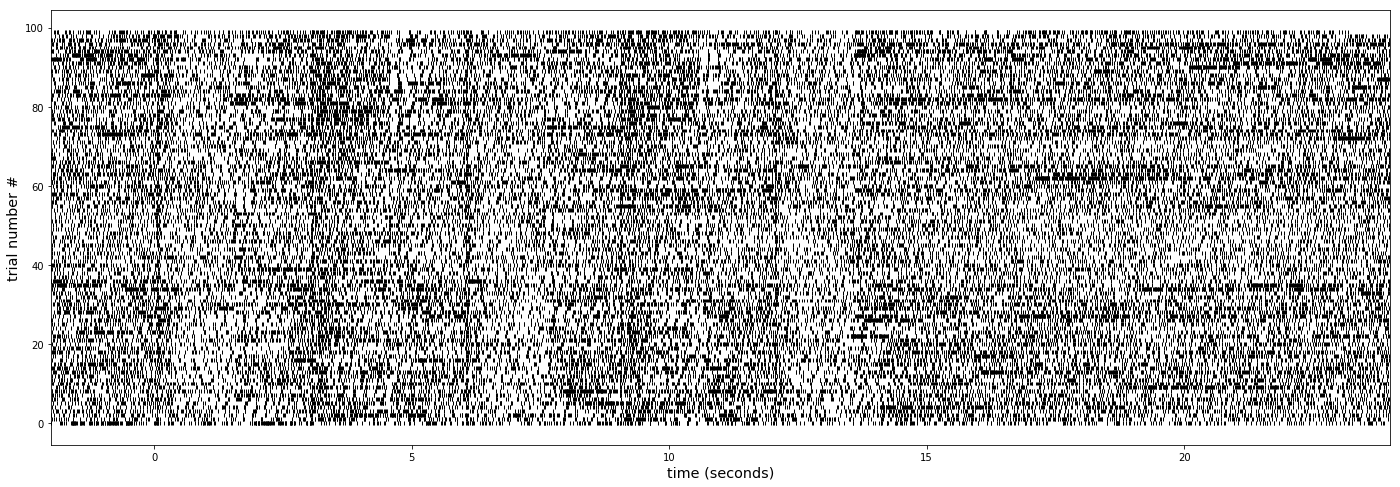

In [82]:
target_channel = 'WBC04a'
roi = (-2, 24, (0, 2, 4, 6, 8))
train = spike_trains[target_channel].spike_train



spike.tools.singleChannelExam.previewSingleChannel_aligned(train, 
                                                          spike_marker.table_marker.time[::5].values,
                                                          roi, size=(24,8), width=1, newmarker=False)
plt.savefig(os.path.join(_temp, experiment_id+'_'+target_channel+'_aligned.eps'), bbox_inches='tight')

In [ ]:
# marker validity test

import h5py, scipy.io
with h5py.File(_data+".mat","r") as f:
    csvMarker = f.get('DIG01')['times'].value[0]
#_raw_data = scipy.io.loadmat(_data+".mat")
#csvMarker = _raw_data['DIG01']['times'][0][0].transpose()[0]
marker_table = pd.read_csv(_data+'.csv')


spike.markerPlot(csvMarker, trim[trim.marker!='gray'].time.values[1:-2])
#spike.markerPlot(csvMarker, marker_table[marker_table.marker!='gray'].time.values[1:-2])
plt.show()

---

In [20]:
fuzzy_B = []
fuzzy_A = []
for (idx, (value, _)) in enumerate(spike_marker.table_marker[::5].values):
    if (idx + 4) % 10 == 0:
        fuzzy_B.append(value)
    else:
        fuzzy_A.append(value)

In [13]:
def previewSingleChannel_aligned(train, markers, roi, offset=0,
                                 size=(15, 6), xlims=None, width=1, newfigure=True, 
                                 colorset='black', markersize=(2, 5), newmarker=True,
                                 labelsize='x-large'):
    start, end, submarkers = roi
    if newfigure:
        plt.figure(figsize=size)
    for (idx, mark) in enumerate(markers):
        roi_train = train[(mark+start < train) & (train < mark+end)]
        print(mark)
        print(roi_train)
        return
        plt.vlines(roi_train-mark, idx-0.5+offset, idx+0.5+offset, linewidth=width, color=colorset)
    if newmarker:
        plt.vlines(submarkers, -1-markersize[0], -1,
                   color='#78C2C4', linewidth=markersize[1])
    plt.xlabel('time (seconds)',fontsize=labelsize)
    plt.ylabel('trial number #',fontsize=labelsize)
    if xlims:
        plt.xlim(xlims)
    else:
        plt.xlim((start, end))
    return

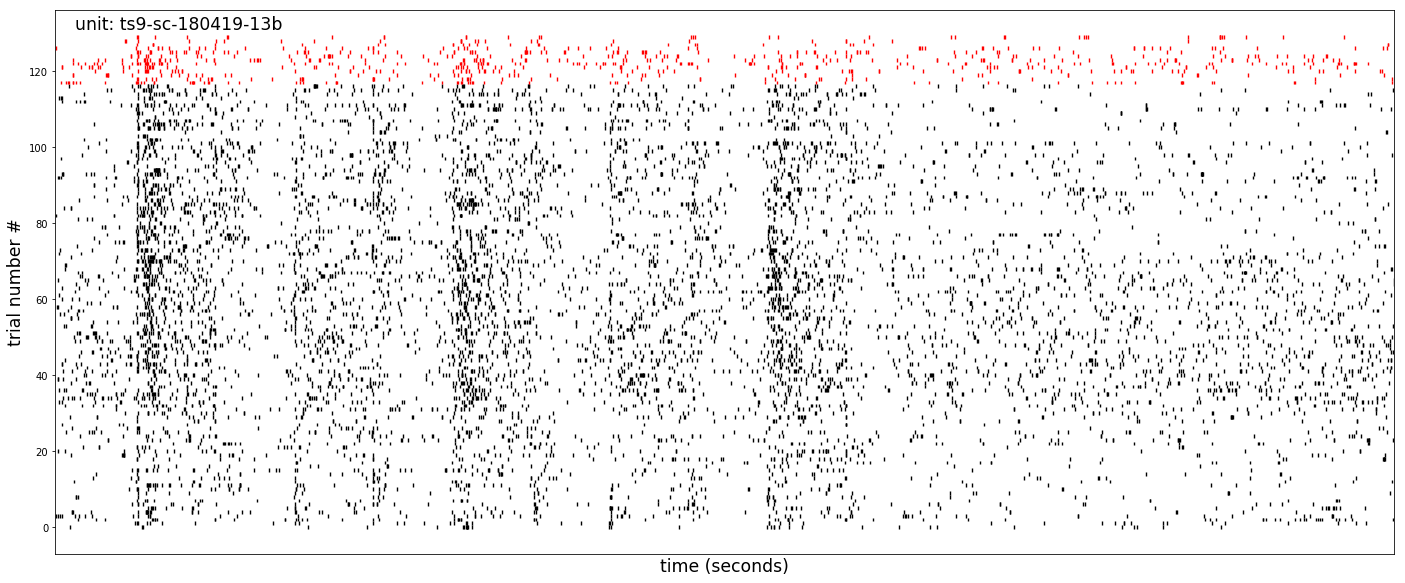

In [21]:
target_channel = 'WBC13b'
roi = (-2, 32, (0, 3, 6, 9, 12))
train = spike_trains[target_channel].spike_train



spike.tools.singleChannelExam.previewSingleChannel_aligned(train, 
                                                          fuzzy_A,
                                                          roi, size=(24,10), width=1.4,colorset='k',
                                                          newmarker=False, labelsize='x-large')
spike.tools.singleChannelExam.previewSingleChannel_aligned(train,  fuzzy_B, roi, 
                                                           offset=len(fuzzy_A), size=(24,5), width=1.4,
                                                           newfigure=False, colorset='r', markersize=(10,5),
                                                          labelsize='xx-large',newmarker=False)
#plt.title("unit: ts8_SC_180415_WBC02b")
plt.xticks([])
plt.text(s="unit: ts9-sc-180419-13b", x=-1.5, y=131, fontsize='xx-large')
plt.savefig(os.path.join(_export, experiment_id+'_'+target_channel+'_aligned.pdf'), bbox_inches='tight')

---

In [2]:
# loading old data
_file = os.path.join(_dir, "linear_filter_{setup}.mat")


ABABA_mean_result = scipy.io.loadmat(_file.format(setup='ABABA'))
ABABB_mean_result = scipy.io.loadmat(_file.format(setup='ABABB'))

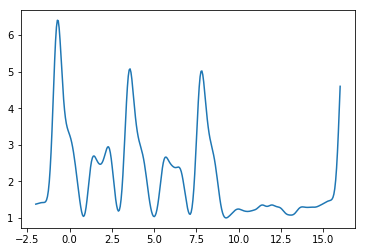

In [8]:
plt.plot(np.linspace(-2,16,340), np.mean(ABABA_mean_result['WBC13b'],0))

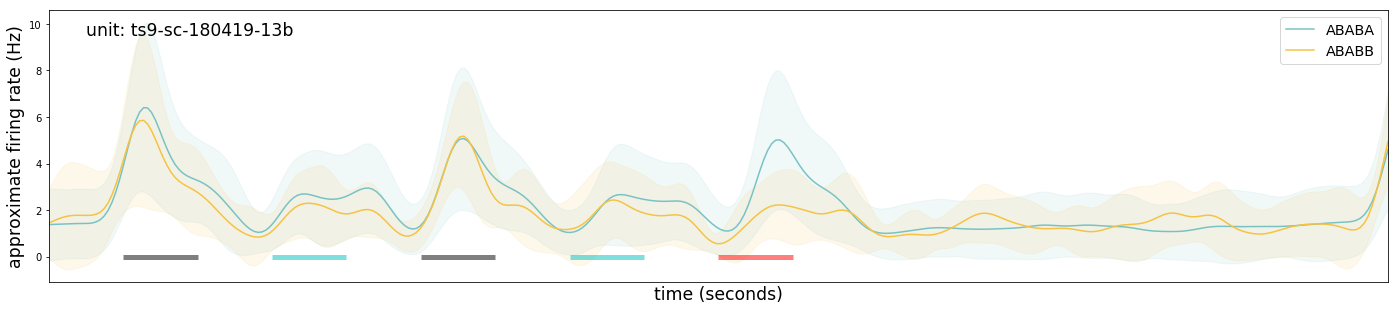

In [18]:
target_channel = 'WBC13b'
roi = (-2, 16, (0, 2, 4, 6, 8))
train = spike_trains[target_channel].spike_train

def _markers(plotax=plt):
    plotax.hlines(0, 0,1.5,linewidth=5,color='k', alpha=0.5)
    plotax.hlines(0, 3,4.5,linewidth=5,color='c', alpha=0.5)
    plotax.hlines(0, 6,7.5,linewidth=5,color='k', alpha=0.5)
    plotax.hlines(0, 9,10.5,linewidth=5,color='c', alpha=0.5)
    plotax.hlines(0, 12,13.5,linewidth=5,color='r', alpha=0.5)
    
def _markers2(plotax=plt):
    plotax.hlines(0, -1,0,linewidth=5,color='k', alpha=0.5)
    plotax.hlines(0, 1,2,linewidth=5,color='c', alpha=0.5)
    plotax.hlines(0, 3,4,linewidth=5,color='k', alpha=0.5)
    plotax.hlines(0, 5,6,linewidth=5,color='c', alpha=0.5)
    plotax.hlines(0, 7,8,linewidth=5,color='r', alpha=0.5)

plt.figure(figsize=(24,5))
spike.plot_curve_with_error_ribbon(ABABA_mean_result[target_channel], roi=roi[0:2],
                                   label='ABABA', color='#78C2C4')
spike.plot_curve_with_error_ribbon(ABABB_mean_result[target_channel], roi=roi[0:2],
                                   label='ABABB', color='#F7C242')
plt.xlabel("time (seconds)",fontsize='xx-large')
plt.legend(fontsize='x-large')
_markers2()
plt.ylabel("approximate firing rate (Hz)", fontsize='xx-large')
plt.text(s="unit: ts9-sc-180419-13b",x=-1.5,y=9.5, fontsize='xx-large')
plt.xticks([])
plt.savefig(os.path.join(_export, experiment_id+'_'+target_channel+'.pdf'), bbox_inches='tight')
# Supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff.
#plt.show()

In [16]:
ABABA_mean_result.keys()

dict_keys(['__header__', '__version__', '__globals__', 'WBC02a', 'WBC03a', 'WBC03b', 'WBC04a', 'WBC05a', 'WBC06a', 'WBC06b', 'WBC07a', 'WBC07b', 'WBC08a', 'WBC08b', 'WBC09a', 'WBC09b', 'WBC09c', 'WBC10a', 'WBC11a', 'WBC11b', 'WBC12a', 'WBC12b', 'WBC13a', 'WBC13b', 'WBC14a', 'WBC14b', 'WBC15a', 'WBC15b', 'WBC16a', 'WBC16b'])

(-2, 16)